In [ ]:
! unzip /content/drive/MyDrive/Cars_Bikes/output.zip 

# Importing Libraries

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt

import numpy as np
import torch
from torch import nn
from torch import optim
import torch.nn.functional as F
from torchvision import datasets, transforms, models
from PIL import Image
from torch.autograd import Variable

In [3]:
test_transforms = transforms.Compose([transforms.Resize(224),
                                      transforms.CenterCrop(224),

                                      transforms.ToTensor(),
                                      transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
                                     ])

#Loading Model

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model=torch.load('/content/drive/MyDrive/Cars_Bikes/model.pt')# Model path
model.eval()
model

#Prediction Function

In [5]:
def predict_image(image):
    image_tensor = test_transforms(image).float()
    image_tensor = image_tensor.unsqueeze_(0)
    input = Variable(image_tensor)
    input = input.to(device)
    output = model(input)
    index = output.data.cpu().numpy().argmax()
    return index

def predict_show_image(image_name):
  im = cv2.imread(image_name)
  im = Image.fromarray(im)
  plt.imshow(im)
  res = predict_image(im)
  if(res==1):
    ch = "Front_Car"
  if(res==0):
    ch = "Front_Bike"
  if(res==2):
    ch = "Rear_Bike"
  if(res==3):
    ch = "Rear_Car"
  plt.title(ch)
  plt.show()

#Testing on a Folder

In [7]:
import os
from PIL import Image
import cv2
# im = Image.open("images/cuba.jpg")
data_direct = "output//val//rear_bike//"
files3 = os.listdir("output//val//rear_bike//")
result = list()
for filee in files3:

  im = cv2.imread(data_direct+filee)
  im = Image.fromarray(im)
  # im = Image.open(data_direct+filee)
  # print(data_direct+filee)
  res = predict_image(im)
  # print(predict_image(im))
  # result.append(predict_image(im))
  if(res==1):
    result.append("Front_Car")
  if(res==0):
    result.append("Front_Bike")
  if(res==2):
    result.append("Rear_Bike")
  if(res==3):
    result.append("Rear_Car")

print(result)
# print(result.count(3),len(result))

['Rear_Bike', 'Rear_Bike', 'Rear_Bike', 'Rear_Bike', 'Rear_Bike', 'Rear_Bike', 'Rear_Bike', 'Rear_Bike', 'Rear_Bike', 'Rear_Bike', 'Rear_Bike', 'Rear_Bike', 'Rear_Bike', 'Rear_Bike', 'Rear_Bike', 'Rear_Bike', 'Rear_Bike', 'Rear_Bike', 'Rear_Bike', 'Rear_Bike', 'Rear_Bike', 'Rear_Bike', 'Rear_Bike', 'Rear_Bike', 'Rear_Bike', 'Rear_Bike', 'Rear_Bike', 'Rear_Bike', 'Rear_Bike', 'Rear_Bike', 'Rear_Bike', 'Rear_Bike', 'Rear_Bike', 'Rear_Bike', 'Rear_Bike', 'Rear_Bike', 'Rear_Bike', 'Rear_Bike', 'Rear_Bike', 'Rear_Bike', 'Rear_Bike', 'Rear_Bike', 'Front_Bike', 'Rear_Bike', 'Rear_Bike', 'Rear_Bike', 'Rear_Bike', 'Rear_Bike', 'Rear_Bike', 'Rear_Bike', 'Rear_Bike', 'Rear_Bike', 'Rear_Bike', 'Rear_Bike', 'Rear_Bike', 'Rear_Bike', 'Rear_Bike', 'Rear_Bike', 'Rear_Bike', 'Rear_Bike', 'Rear_Bike', 'Rear_Bike', 'Rear_Bike', 'Rear_Bike', 'Rear_Bike', 'Rear_Bike', 'Rear_Bike', 'Rear_Bike', 'Rear_Bike', 'Rear_Bike', 'Rear_Bike', 'Rear_Bike', 'Rear_Bike', 'Rear_Bike', 'Rear_Bike', 'Rear_Bike', 'Rear_Bike

#Testing on a Images

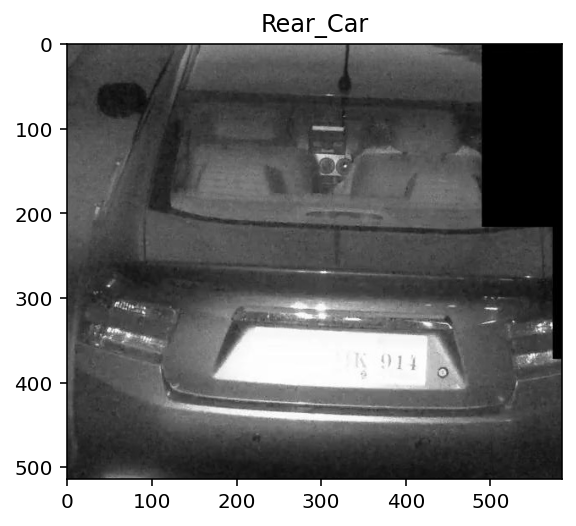

In [8]:
import os
from PIL import Image
import cv2
import random
image_dir = "output//val//rear_car//"
files = os.listdir(image_dir)
n = random.randint(0,len(files))
image_name = image_dir+files[n]
predict_show_image(image_name)


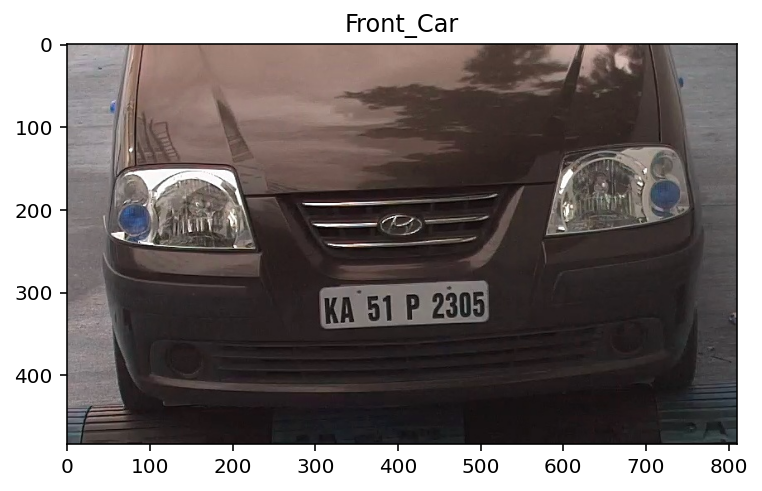

In [11]:
image_dir = "output//val//front_car//"
files = os.listdir(image_dir)
n = random.randint(0,len(files))
image_name = image_dir+files[n]
predict_show_image(image_name)

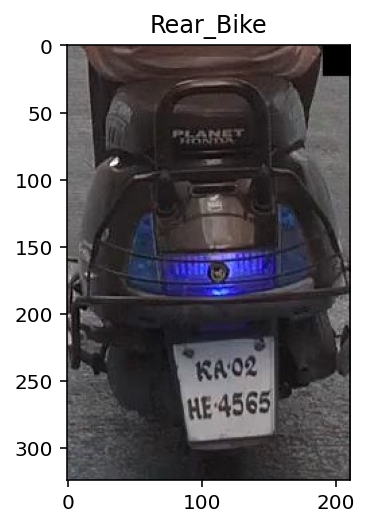

In [14]:
image_dir = "output//val//rear_bike//"
files = os.listdir(image_dir)
n = random.randint(0,len(files))
image_name = image_dir+files[n]
predict_show_image(image_name)

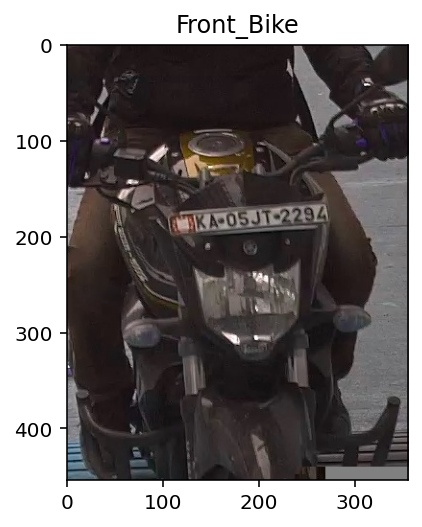

In [15]:
image_dir = "output//val//front_bike//"
files = os.listdir(image_dir)
n = random.randint(0,len(files))
image_name = image_dir+files[n]
predict_show_image(image_name)